#### Задание: проверить следующие гипотезы:
- клиенты чаще звонят днем или вечером по количеству звонков;
- клиенты чаще звонят днем или (вечером + ночью) по количеству звонков.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import (shapiro, kstest,
                         ks_2samp, anderson,
                         jarque_bera,
                         ttest_ind,
                         mannwhitneyu,
                         kruskal) # это карреляции 

#### 1 шаг: предобработка данных

In [4]:
df = pd.read_csv('dataset_telecom.csv')
df

,Возраст,Среднемесячный расход,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Звонки в другие города,Звонки в другие страны,Доля звонков на стационарные телефоны,Количество SMS за месяц,Дата подключения тарифа
0,24,NaN,2.4,12.0,65.0,5,0,0,5,56,2018-06-17 12:14:35
1,51,287.51,1.7,111.0,109.0,1,44,0,6,1,2021-10-21 15:39:54
2,41,113.70,2.1,41.0,27.0,0,0,0,1,36,2015-03-26 11:26:15
3,35,410.23,5.6,47.0,49.0,0,0,0,11,23,2016-01-04 15:53:20
4,26,537.60,4.8,58.0,77.0,4,0,0,16,29,2017-05-03 13:33:53
...,...,...,...,...,...,...,...,...,...,...,...
4487,40,186.20,3.7,36.0,28.0,2,6,0,12,30,2021-04-10 14:58:23
4488,40,500.68,6.0,46.0,66.0,0,6,0,15,23,2021-09-22 14:52:43
4489,60,470.42,3.5,58.0,129.0,2,4,0,19,5,2019-04-04 17:33:38
4490,38,858.99,9.3,50.0,74.0,0,0,0,28,69,2015-12-30 16:28:26


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Возраст                                4492 non-null   int64  
 1   Среднемесячный расход                  4468 non-null   float64
 2   Средняя продолжительность разговоров   4475 non-null   float64
 3   Звонков днем за месяц                  4472 non-null   float64
 4   Звонков вечером за месяц               4489 non-null   float64
 5   Звонков ночью за месяц                 4492 non-null   object 
 6   Звонки в другие города                 4492 non-null   object 
 7   Звонки в другие страны                 4492 non-null   int64  
 8   Доля звонков на стационарные телефоны  4492 non-null   object 
 9   Количество SMS за месяц                4492 non-null   object 
 10  Дата подключения тарифа                4492 non-null   object 
dtypes: f

In [6]:
df.isnull().sum()

Возраст                                   0
Среднемесячный расход                    24
Средняя продолжительность разговоров     17
Звонков днем за месяц                    20
Звонков вечером за месяц                  3
Звонков ночью за месяц                    0
Звонки в другие города                    0
Звонки в другие страны                    0
Доля звонков на стационарные телефоны     0
Количество SMS за месяц                   0
Дата подключения тарифа                   0
dtype: int64

In [7]:
df.isnull().sum ()/len(df)*100

Возраст                                  0.000000
Среднемесячный расход                    0.534283
Средняя продолжительность разговоров     0.378451
Звонков днем за месяц                    0.445236
Звонков вечером за месяц                 0.066785
Звонков ночью за месяц                   0.000000
Звонки в другие города                   0.000000
Звонки в другие страны                   0.000000
Доля звонков на стационарные телефоны    0.000000
Количество SMS за месяц                  0.000000
Дата подключения тарифа                  0.000000
dtype: float64

 | | Column         |                        Non-Null Count | Dtype  |      |
 |:----:|:----:|:----:|:---:|:--:|
 |0   |Возраст                                |4492 non-null  | int64  |  + 
| 1   |Среднемесячный расход                  |4468 non-null  | float64 | не хватает данных
| 2   |Средняя продолжительность разговоров  | 4475 non-null  | float64| не хватает данных, перевести в инт?
| 3   |Звонков днем за месяц                 | 4472 non-null  | float64| не хватает данных, перевести в инт?
 |4   |Звонков вечером за месяц              | 4489 non-null   |float64| не хватает данных, перевести в инт?
| 5   |Звонков ночью за месяц                | 4492 non-null  | object | все данные, почему обжект, перевести в инт
| 6   |Звонки в другие города                | 4492 non-null  |object | все данные, почему обжект, перевести в инт
| 7   |Звонки в другие страны                | 4492 non-null  | int64  | +
| 8   |Доля звонков на стационарные телефоны | 4492 non-null  | object | перевести в инт 
| 9   |Количество SMS за месяц               | 4492 non-null  | object | перевести в инт
| 10  |Дата подключения тарифа               | 4492 non-null  | object | перевести в дату 

In [9]:
dt = df.copy()

In [10]:
dct_name = {'Возраст': 'age',
            'Среднемесячный расход': 'avar_rasxod',
            'Средняя продолжительность разговоров': 'avar_time_speak', 
            'Звонков днем за месяц': 'calls_day',
            'Звонков вечером за месяц': 'calls_evening', 
            'Звонков ночью за месяц': 'calls_night',
            'Звонки в другие города': 'calls_city', 
            'Звонки в другие страны': 'calls_country',
            'Доля звонков на стационарные телефоны': 'staz_telephone', 
            'Количество SMS за месяц': 'sms',
            'Дата подключения тарифа': 'date'}
dt.rename(columns=dct_name,
          inplace=True)

In [11]:
columns_to_pic = dict(zip(dct_name.values(), dct_name.keys()))
print(columns_to_pic)

{'age': 'Возраст', 'avar_rasxod': 'Среднемесячный расход', 'avar_time_speak': 'Средняя продолжительность разговоров', 'calls_day': 'Звонков днем за месяц', 'calls_evening': 'Звонков вечером за месяц', 'calls_night': 'Звонков ночью за месяц', 'calls_city': 'Звонки в другие города', 'calls_country': 'Звонки в другие страны', 'staz_telephone': 'Доля звонков на стационарные телефоны', 'sms': 'Количество SMS за месяц', 'date': 'Дата подключения тарифа'}


In [12]:
dt

,age,avar_rasxod,avar_time_speak,calls_day,calls_evening,calls_night,calls_city,calls_country,staz_telephone,sms,date
0,24,NaN,2.4,12.0,65.0,5,0,0,5,56,2018-06-17 12:14:35
1,51,287.51,1.7,111.0,109.0,1,44,0,6,1,2021-10-21 15:39:54
2,41,113.70,2.1,41.0,27.0,0,0,0,1,36,2015-03-26 11:26:15
3,35,410.23,5.6,47.0,49.0,0,0,0,11,23,2016-01-04 15:53:20
4,26,537.60,4.8,58.0,77.0,4,0,0,16,29,2017-05-03 13:33:53
...,...,...,...,...,...,...,...,...,...,...,...
4487,40,186.20,3.7,36.0,28.0,2,6,0,12,30,2021-04-10 14:58:23
4488,40,500.68,6.0,46.0,66.0,0,6,0,15,23,2021-09-22 14:52:43
4489,60,470.42,3.5,58.0,129.0,2,4,0,19,5,2019-04-04 17:33:38
4490,38,858.99,9.3,50.0,74.0,0,0,0,28,69,2015-12-30 16:28:26


In [13]:
for col in dt: 
    print(f'----- признак {col} -----')
    print(dt[col].unique())
    print('--'*5)

----- признак age -----
[24 51 41 35 26 50 66 36 40 23 29 43 21 37 69 46 48 52 59 27 30 53 38 34
 19 54 45 25 60 68 65 63 31 39 20 44 56 33 49 55 67 47 61 64 32 57 28 42
 70 58 62]
----------
----- признак avar_rasxod -----
[   nan 287.51 113.7  ... 470.42 858.99 151.92]
----------
----- признак avar_time_speak -----
[ 2.4   1.7   2.1   5.6   4.8   3.3   4.1   1.1   2.5   1.6  13.8   3.4
   nan  2.    5.1   1.9   2.7   3.5   7.3   2.8   8.4   0.7   7.5   6.4
  5.2   3.8   3.9   2.3   7.6   5.4   2.2  14.4   7.4   3.1   6.    6.6
  0.4   4.3   2.6   7.2   5.3   1.2   2.9   8.3   9.8   9.9   1.5   3.7
  1.3  18.2   9.3   7.    4.4   9.2  15.6   8.8   1.4   4.9   6.2  17.
 11.   11.6   1.8   3.2   8.    6.8   9.4   3.6   4.   12.4   3.    9.6
  8.1   4.2   4.6   5.7   5.    0.6   6.1   8.5   7.9   5.9   9.7  11.4
  0.5   6.7  10.4   6.3   4.7  12.6   1.    7.8   0.1  20.    7.7   8.2
  5.5   0.9  10.2   6.5   5.8  10.   14.8   9.1   7.1   0.8   9.   16.4
 12.8   0.3  14.2   8.6  13.4  13.

Проверим есть ли ноль в столбцах с пропущенными значениями. Поскольку можно предположить, что отсутствие данных из-за отсутсвия звонков.

In [15]:
0 in dt["calls_day"].unique()

False

In [16]:
0 in dt["calls_evening"].unique()

False

Итак в данных столбцах значение ноль не обнаружено, значит зададим всем пропущенным значениям в данных столбцах значение 0.

In [18]:
dt['calls_day'] = dt['calls_day'].fillna(0)
print('Количество NaN в столбце -', dt['calls_day'].isnull().sum())

Количество NaN в столбце - 0


In [19]:
dt['calls_evening'] = dt['calls_evening'].fillna(0)
print('Количество NaN в столбце -', dt['calls_evening'].isnull().sum())

Количество NaN в столбце - 0


In [20]:
dt[dt.isna().any(axis=1)]

,age,avar_rasxod,avar_time_speak,calls_day,calls_evening,calls_night,calls_city,calls_country,staz_telephone,sms,date
0,24,NaN,2.4,12.0,65.0,5,0,0,5,56,2018-06-17 12:14:35
12,43,636.75,NaN,59.0,64.0,0,0,0,8,18,2021-09-06 10:13:54
19,52,17.69,NaN,7.0,5.0,0,0,0,0,0,2016-05-18 16:22:22
37,53,351.26,NaN,106.0,43.0,2,41,2,27,4,2019-03-07 10:03:38
41,53,NaN,3.8,48.0,73.0,4,0,0,15,4,2019-07-14 14:57:14
62,54,NaN,2.8,51.0,95.0,5,0,1,15,2,2021-08-04 13:34:47
78,39,199.70,NaN,67.0,47.0,1,13,0,5,36,2016-06-30 18:29:47
84,26,NaN,2.9,63.0,84.0,2,0,0,9,39,2015-09-20 15:39:24
86,48,484.44,NaN,0.0,45.0,4,0,0,11,4,2016-08-10 16:06:26
94,26,NaN,6.6,46.0,82.0,0,0,1,16,48,2020-07-27 17:56:09


Практически все отсутствующие значения находятся в строках с отсутствующими значениями по звонкам, можно предположить, что среднее значение считает программа и в случае отсутствия всего одного показателя подсчет выдает ошибку и пустое значение. 

In [22]:
dt['staz_telephone'] = dt['staz_telephone'].astype(str)
dt['staz_telephone'] = dt['staz_telephone'].str.replace("'", "")

dt['sms'] = dt['sms'].astype(str)
dt['sms'] = dt['sms'].str.replace("'", "")

dt['calls_city'] = dt['calls_city'].astype(str)
dt['calls_city'] = dt['calls_city'].str.replace("'", '')

dt ['calls_night'] = dt['calls_night'].astype(str)
dt['calls_night'] = dt['calls_night'].str.replace("'", '')

In [23]:
dt = dt.astype({'date': 'datetime64[ns]',
                'calls_city': 'int64',
                'calls_day': 'int64',
               'calls_evening': 'int64',
               'calls_night': 'int64',
               'staz_telephone': 'int64',
               'sms': 'int64'},
               errors='ignore')
dt.dtypes

age                         int64
avar_rasxod               float64
avar_time_speak           float64
calls_day                   int64
calls_evening               int64
calls_night                 int64
calls_city                  int64
calls_country               int64
staz_telephone              int64
sms                         int64
date               datetime64[ns]
dtype: object

In [24]:
dt.describe()

,age,avar_rasxod,avar_time_speak,calls_day,calls_evening,calls_night,calls_city,calls_country,staz_telephone,sms,date
count,4492.000000,4468.000000,4475.000000,4492.000000,4492.000000,4492.000000,4492.000000,4492.000000,4492.000000,4492.000000,4492
mean,41.894924,505.533577,4.230827,63.614871,70.316785,6.273152,8.661175,0.394034,10.331701,21.243321,2018-07-10 01:04:50.785841664
min,19.000000,3.180000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015-01-01 15:48:33
25%,31.000000,152.490000,2.100000,36.000000,42.000000,0.000000,0.000000,0.000000,3.000000,3.000000,2016-10-21 08:23:49.500000
50%,43.000000,315.510000,3.300000,53.000000,71.000000,1.000000,2.000000,0.000000,8.000000,6.000000,2018-06-21 16:56:24.500000
75%,52.000000,599.840000,5.900000,68.000000,98.000000,5.000000,12.000000,0.000000,16.000000,32.000000,2020-04-04 18:48:26.750000128
max,70.000000,5142.760000,20.000000,500.000000,160.000000,110.000000,88.000000,12.000000,60.000000,179.000000,2021-12-31 14:12:11
std,13.077254,646.354693,3.005210,62.881338,41.246224,14.713034,13.478042,1.171980,9.222693,27.911864,NaN


In [25]:
print(f'В наборе данных имется {dt.duplicated().sum()} дублей')

В наборе данных имется 0 дублей


#### Шаг 2: проверка гипотез

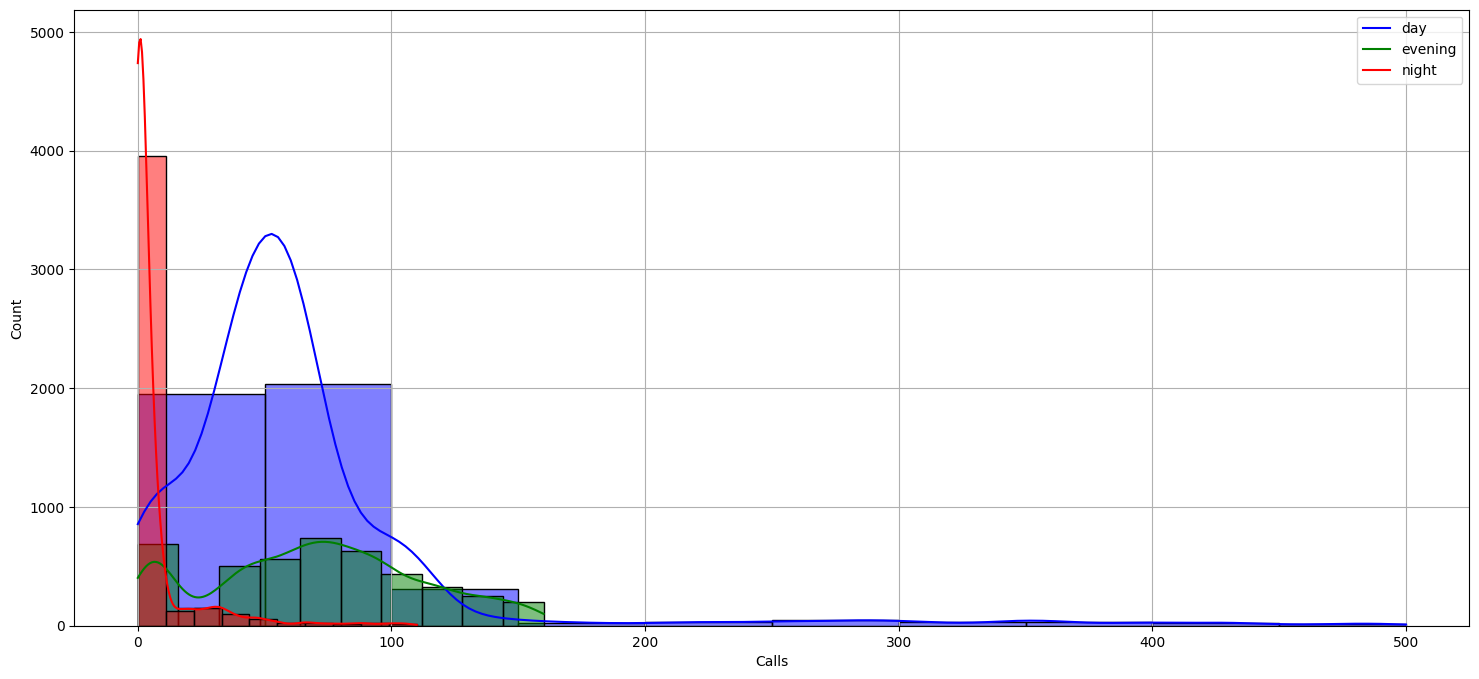

In [27]:
fig, ax = plt.subplots(figsize=(18,8))
plt.grid()
sns.histplot(data=dt, x='calls_day', color='blue', kde=True, bins=10)

sns.histplot(data=dt, x='calls_evening', color='green', kde=True, bins=10)

sns.histplot(data=dt, x='calls_night', color='red', kde=True, bins=10)

plt.xlabel('Calls')
plt.legend(['day', 'evening', 'night'])
plt.show()

Проверка гипотезы о нормальности распределения    
1 гипотеза: клиенты чаще звонят днем, чем вечером

In [29]:
alpha = 0.05
shapiro_day = shapiro(dt['calls_day'])
shapiro_evening = shapiro(dt['calls_evening'])
shapiro_night = shapiro(dt['calls_night'])


if shapiro_day.pvalue < alpha or shapiro_evening.pvalue < alpha:
    print("Распределение отлично от нормального, используем критерий Манна-Уитни.")
    mannwhitney_stat, mannwhitney_pval = mannwhitneyu(dt['calls_day'], dt['calls_evening'])
    if mannwhitney_pval < alpha:
        print("Отвергаем гипотезу: клиенты чаще звонят днем,чем вечером")
    else:
        print("Не отвергаем гипотезу")
else:
    print("Распределение нормальное, используем t-критерий Стьюдента.")
    t_stat, p_value = stats.ttest_ind(dt['calls_day'], dt['calls_evening'])
    if p_value < alpha:
        print("Отвергаем гипотезу: клиенты чаще звонят днем, чем вечером.")
    else:
        print("Не отвергаем гипотезу")

Распределение отлично от нормального, используем критерий Манна-Уитни.
Отвергаем гипотезу: клиенты чаще звонят днем,чем вечером


2 гипотеза: клиенты звонят чаще днем чем вечером и ночью

In [31]:
alpha = 0.05
shapiro_day = shapiro(dt['calls_day'])
shapiro_evening = shapiro(dt['calls_evening'])
shapiro_night = shapiro(dt['calls_night'])
shapiro_evening_night = shapiro_evening+shapiro_night

if shapiro_day.pvalue < alpha or shapiro_evening_night.pvalue < alpha:
    print("Распределение отлично от нормального, используем критерий Манна-Уитни.")
    mannwhitney_stat, mannwhitney_pval = mannwhitneyu(dt['calls_day'], (dt['calls_evening']+dt['calls_night']))
    if mannwhitney_pval < alpha:
        print("Отвергаем гипотезу: клиенты чаще звонят днем, чем вечером + ночью.")
    else:
        print("Не отвергаем гипотезу: нет статистически значимой разницы в количестве звонков днем и вечером  + ночью.")
else:
    print("Распределение нормальное, используем t-критерий Стьюдента.")
    t_stat, p_value = stats.ttest_ind(dt['calls_day'], (dt['calls_evening']+dt['calls_night']))
    if p_value < alpha:
        print("Отвергаем гипотезу: клиенты чаще звонят днем, чем вечером + ночью.")
    else:
        print("Не отвергаем гипотезу: нет статистически значимой разницы в количестве звонков днем и вечером  + ночью.")

Распределение отлично от нормального, используем критерий Манна-Уитни.
Отвергаем гипотезу: клиенты чаще звонят днем, чем вечером + ночью.


In [32]:
dt.agg({'calls_day': ['median', 'mean'],
        'calls_evening' : ['median', 'mean'],
       'calls_night': ['median', 'mean']})

,calls_day,calls_evening,calls_night
median,53.000000,71.000000,1.000000
mean,63.614871,70.316785,6.273152


Проверив гипотезы и изучив среднее по звонкам можно сделать вывод, что звонят чаще вечером.

#### 3 шаг - анализ корреляции для признаков

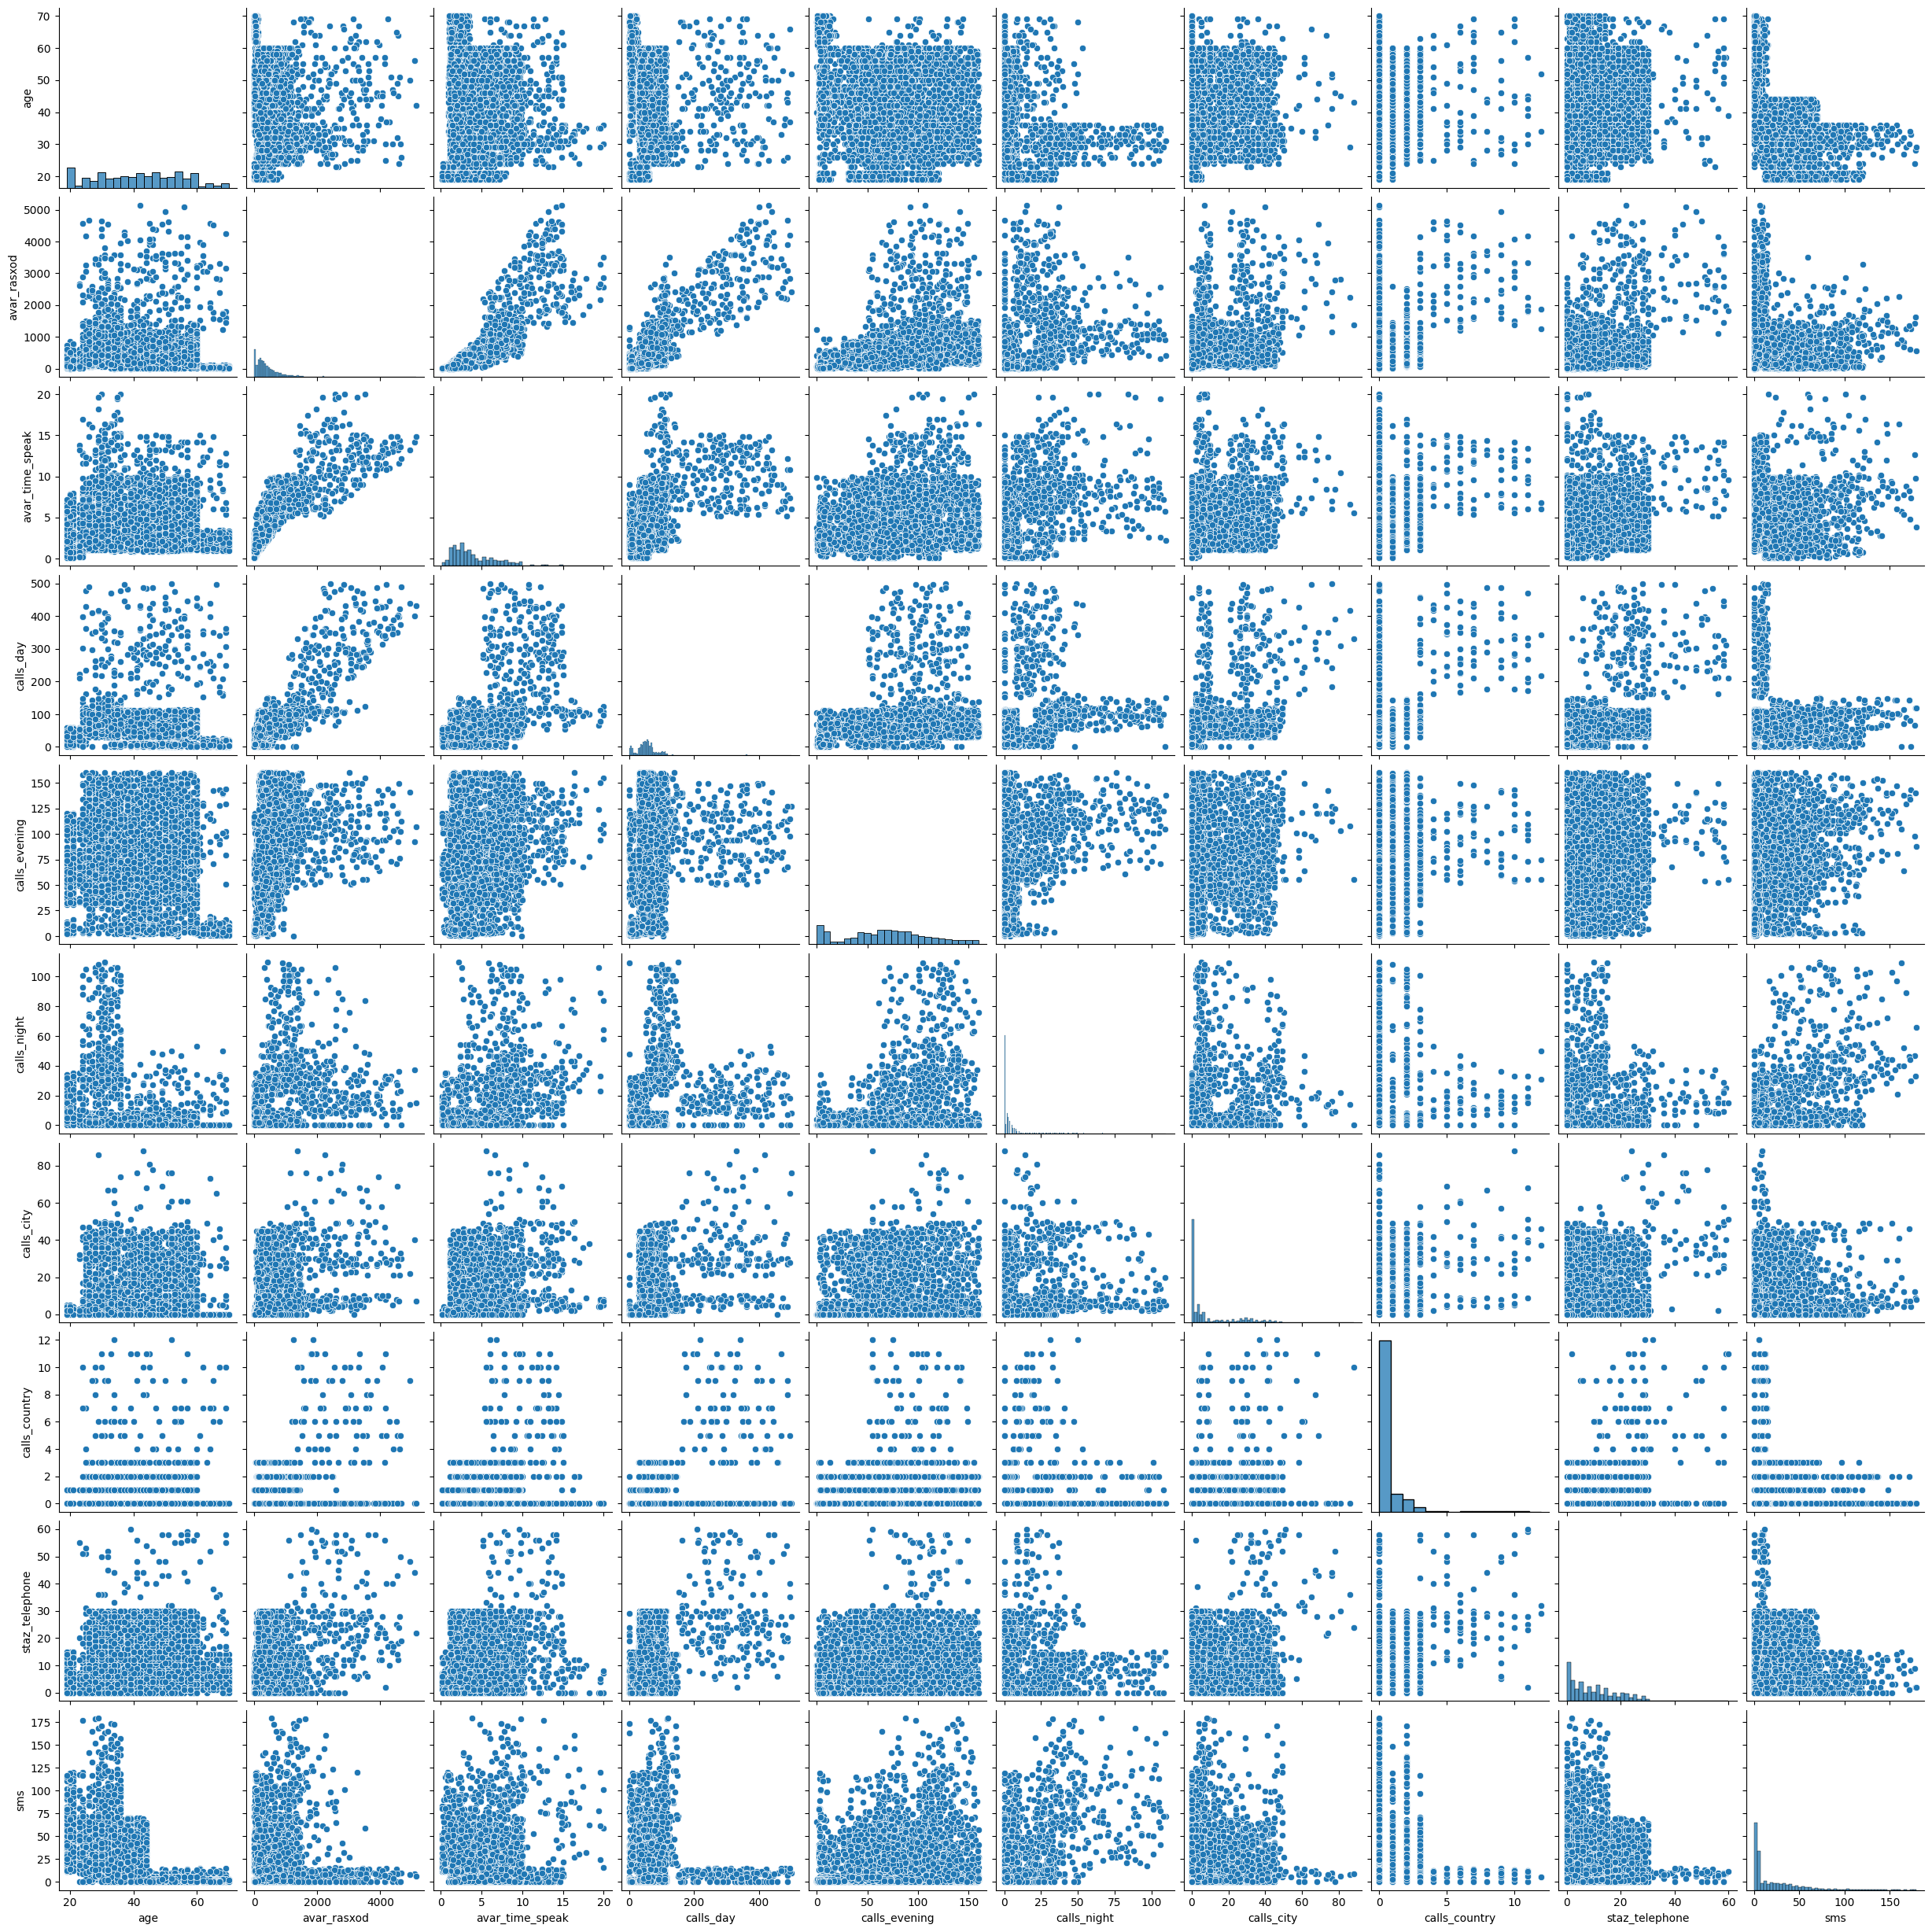

In [35]:
sns.pairplot(dt)

In [36]:
lstp = ['age', 'avar_rasxod',  'avar_time_speak', 'calls_day', 'calls_evening', 'calls_night', 'calls_city', 'calls_country', 'staz_telephone', 'sms']

In [37]:
# коэффициенты парные Пирсона
dt[lstp].corr()

,age,avar_rasxod,avar_time_speak,calls_day,calls_evening,calls_night,calls_city,calls_country,staz_telephone,sms
age,1.000000,-0.015482,-0.045908,-0.011196,-0.193259,-0.267692,0.029016,0.024974,0.120398,-0.592306
avar_rasxod,-0.015482,1.000000,0.830043,0.841281,0.421382,0.392867,0.334959,0.381036,0.357464,0.090569
avar_time_speak,-0.045908,0.830043,1.000000,0.514486,0.320750,0.397296,0.261224,0.230470,0.239811,0.183479
calls_day,-0.011196,0.841281,0.514486,1.000000,0.311648,0.312640,0.369723,0.441499,0.417296,0.025062
calls_evening,-0.193259,0.421382,0.320750,0.311648,1.000000,0.285980,0.199510,0.117568,0.199466,0.234484
calls_night,-0.267692,0.392867,0.397296,0.312640,0.285980,1.000000,0.143087,0.125936,-0.015102,0.510603
calls_city,0.029016,0.334959,0.261224,0.369723,0.199510,0.143087,1.000000,0.198812,0.257176,0.017626
calls_country,0.024974,0.381036,0.230470,0.441499,0.117568,0.125936,0.198812,1.000000,0.237378,-0.033195
staz_telephone,0.120398,0.357464,0.239811,0.417296,0.199466,-0.015102,0.257176,0.237378,1.000000,-0.122786
sms,-0.592306,0.090569,0.183479,0.025062,0.234484,0.510603,0.017626,-0.033195,-0.122786,1.000000


In [38]:
# корреляция по Кендаллу
dt[lstp].corr('kendall')

,age,avar_rasxod,avar_time_speak,calls_day,calls_evening,calls_night,calls_city,calls_country,staz_telephone,sms
age,1.000000,-0.031997,-0.020752,-0.036752,-0.119492,-0.254330,-0.002001,0.011459,0.085912,-0.505054
avar_rasxod,-0.031997,1.000000,0.738670,0.487857,0.432908,0.206393,0.295551,0.137500,0.227929,0.160925
avar_time_speak,-0.020752,0.738670,1.000000,0.304513,0.224722,0.177498,0.235805,0.102425,0.171248,0.132633
calls_day,-0.036752,0.487857,0.304513,1.000000,0.274432,0.195626,0.293620,0.146200,0.221229,0.153497
calls_evening,-0.119492,0.432908,0.224722,0.274432,1.000000,0.205650,0.198329,0.097976,0.143323,0.206139
calls_night,-0.254330,0.206393,0.177498,0.195626,0.205650,1.000000,0.144313,0.079395,0.011032,0.295640
calls_city,-0.002001,0.295551,0.235805,0.293620,0.198329,0.144313,1.000000,0.121550,0.182186,0.097539
calls_country,0.011459,0.137500,0.102425,0.146200,0.097976,0.079395,0.121550,1.000000,0.114785,0.028599
staz_telephone,0.085912,0.227929,0.171248,0.221229,0.143323,0.011032,0.182186,0.114785,1.000000,0.012192
sms,-0.505054,0.160925,0.132633,0.153497,0.206139,0.295640,0.097539,0.028599,0.012192,1.000000


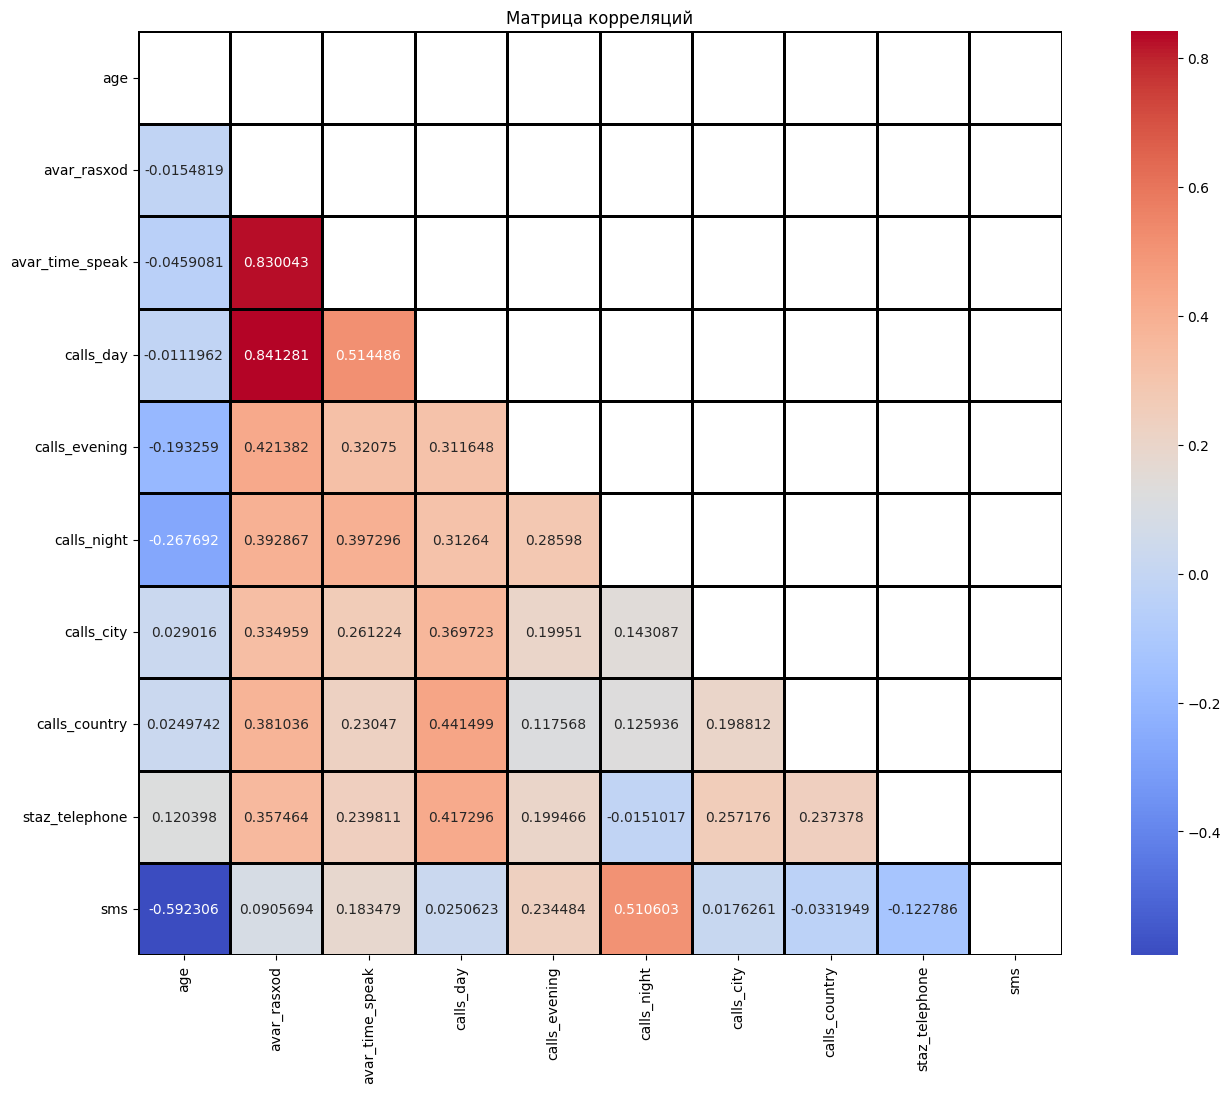

In [39]:
fig, ax = plt.subplots(figsize=(18,12))
ax = sns.heatmap(data = dt[lstp].corr(),
                 annot= True,
                 square=True,
                 cmap='coolwarm',
                 fmt='g',
                 linewidths=1, 
                 linecolor='black',
                 mask=np.triu(dt[lstp].corr()))
plt.title('Матрица корреляций')
plt.show()